## Machine Learning Project

In [1]:
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

#VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

#split the data in training and testing
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

# Logistic Regression algo
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import multilabel_confusion_matrix,accuracy_score,classification_report,confusion_matrix

from sklearn.preprocessing import MinMaxScaler,StandardScaler


# Decision Tree algo
from sklearn.tree import DecisionTreeClassifier,plot_tree

# Random Forest algo
from sklearn.ensemble import RandomForestClassifier


# optional
import warnings
warnings.filterwarnings('ignore')

## Problem Statement

## Data Gathering

In [2]:
df=pd.read_csv(r"E:\Python\ml\Customer_Behaviour.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
df.shape

(400, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
# check count of unique values in each columns
for col in df:
    print(f"{col}: {df[col].nunique()}")

User ID: 400
Gender: 2
Age: 43
EstimatedSalary: 117
Purchased: 2


In [7]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [8]:
df.describe(include=[object])

,Gender
count,400
unique,2
top,Female
freq,204


In [9]:
# do not need the user ID column to build the predictive model
df.drop('User ID', axis=1, inplace=True)
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [10]:
df["Purchased"].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

<Axes: ylabel='Age'>

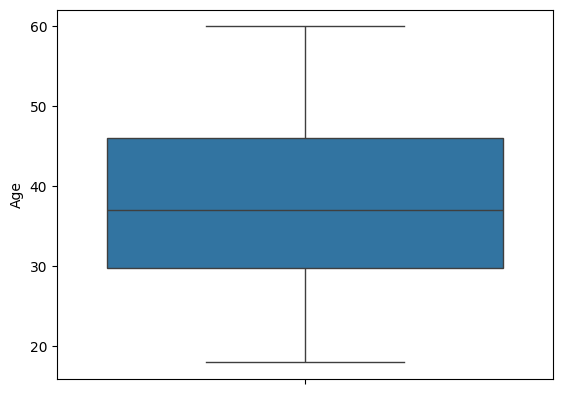

In [11]:
# check Outliers
sns.boxplot(df["Age"])

<Axes: ylabel='EstimatedSalary'>

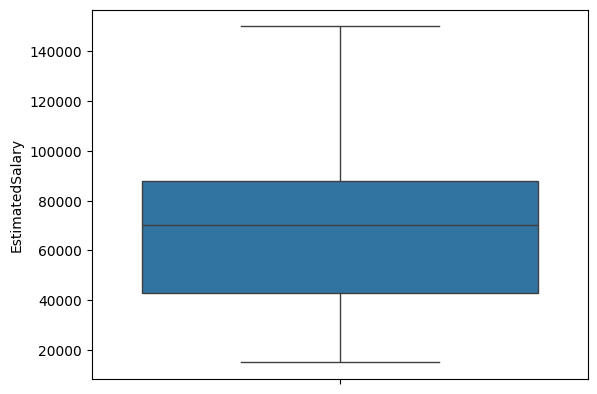

In [12]:
sns.boxplot(df["EstimatedSalary"])

<Axes: xlabel='Gender', ylabel='count'>

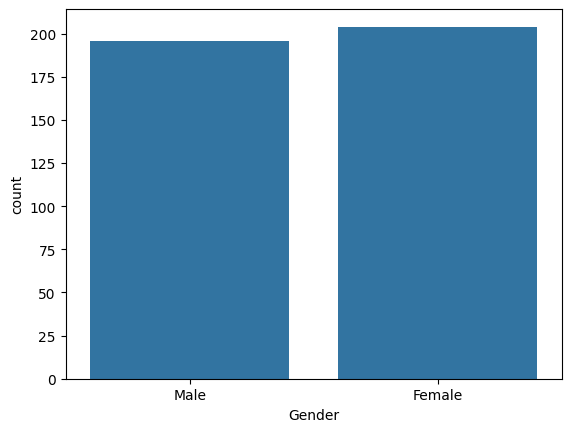

In [13]:
sns.countplot(x=df["Gender"])

<Axes: xlabel='Purchased', ylabel='Density'>

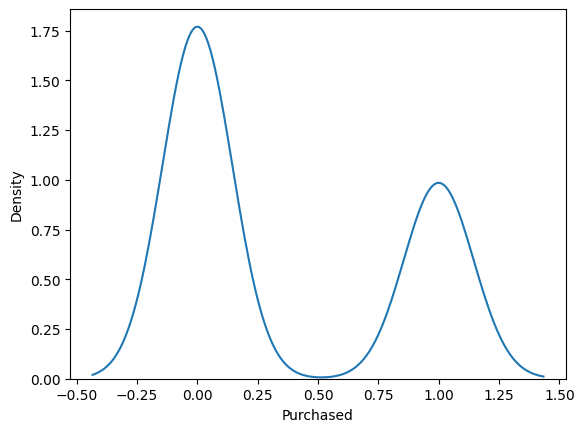

In [14]:
sns.kdeplot(df["Purchased"])

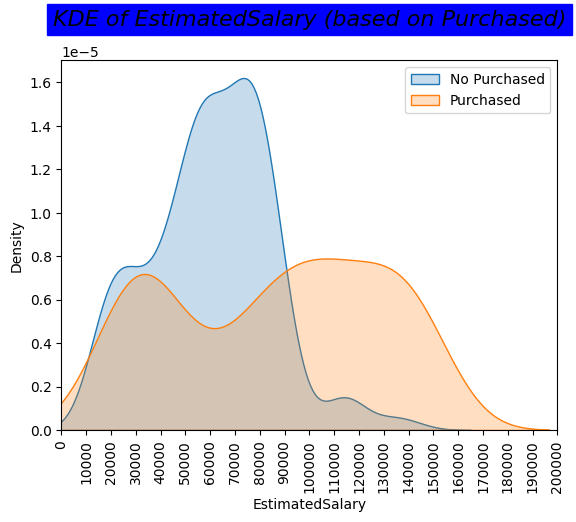

In [15]:
# check distribution of EstimatedSalary (based on Purchased)
font = {'fontsize':16, 'fontstyle':'italic', 'backgroundcolor':'blue', 'color':'black'}

plt.style.use('default')

sns.kdeplot(df.loc[df['Purchased'] == 0, 'EstimatedSalary'], label='No Purchased', shade=True)
sns.kdeplot(df.loc[df['Purchased'] == 1, 'EstimatedSalary'], label='Purchased', shade=True)
plt.title('KDE of EstimatedSalary (based on Purchased)', fontdict=font, pad=25)
plt.xticks(np.arange(0,200001,10000), rotation=90)
plt.xlim([0,200001])
plt.legend()
plt.show()

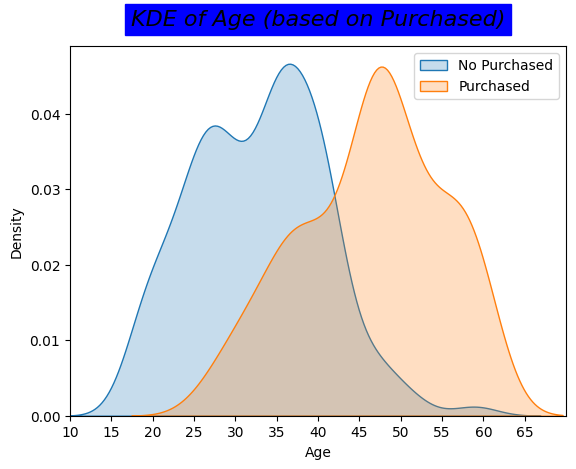

In [16]:
font = {'fontsize': 16, 'fontstyle': 'italic', 'backgroundcolor': 'blue', 'color': 'black'}
plt.style.use('default')  # You can choose a different style if needed

sns.kdeplot(df.loc[df['Purchased'] == 0, 'Age'], label='No Purchased', shade=True)
sns.kdeplot(df.loc[df['Purchased'] == 1, 'Age'], label='Purchased', shade=True)
plt.title('KDE of Age (based on Purchased)', fontdict=font, pad=15)
plt.xticks(np.arange(0, 70, 5))
plt.xlim([10, 70])
plt.legend()
plt.show()

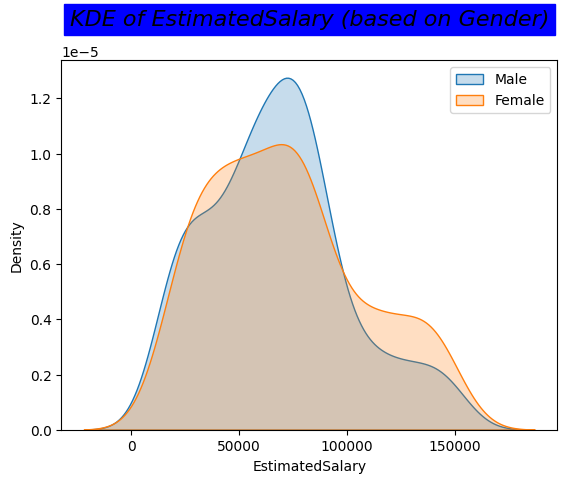

In [17]:
font = {'fontsize': 16, 'fontstyle': 'italic', 'backgroundcolor': 'blue', 'color': 'black'}

plt.style.use('default')  # You can choose a different style if needed

sns.kdeplot(df.loc[df['Gender'] == 'Male', 'EstimatedSalary'], label='Male', shade=True)
sns.kdeplot(df.loc[df['Gender'] == 'Female', 'EstimatedSalary'], label='Female', shade=True)
plt.title('KDE of EstimatedSalary (based on Gender)', fontdict=font, pad=25)
plt.legend()
plt.show()

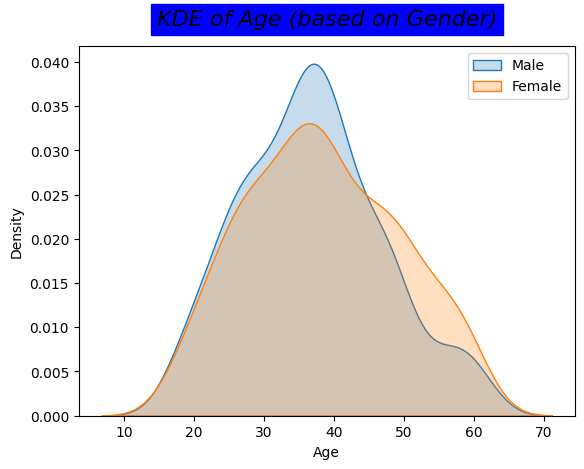

In [18]:
font = {'fontsize': 16, 'fontstyle': 'italic', 'backgroundcolor': 'blue', 'color': 'black'}

plt.style.use('default')  # You can choose a different style if needed

sns.kdeplot(df.loc[df['Gender'] == 'Male', 'Age'], label='Male', shade=True)
sns.kdeplot(df.loc[df['Gender'] == 'Female', 'Age'], label='Female', shade=True)
plt.title('KDE of Age (based on Gender)', fontdict=font, pad=15)
plt.legend()
plt.show()

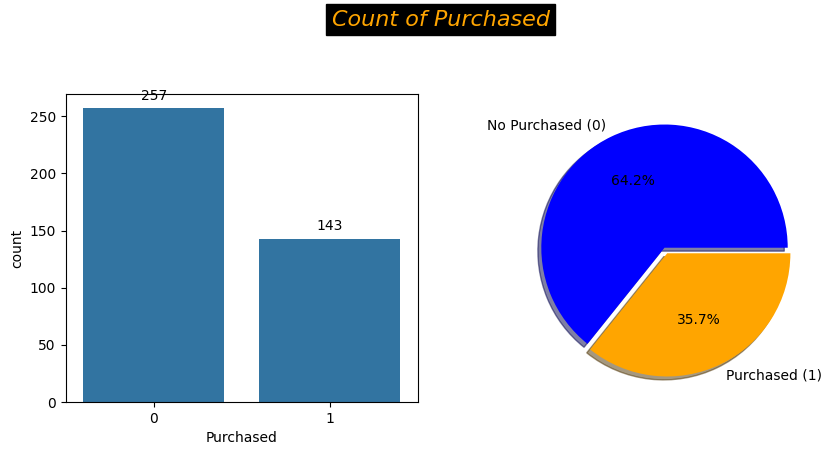

In [19]:
font = {'fontsize': 16, 'fontstyle': 'italic', 'backgroundcolor': 'black', 'color': 'orange'}
plt.style.use('default')  # You can choose a different style if needed

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Countplot
sns.countplot(data=df, x='Purchased', ax=axes[0])
for p in axes[0].patches:
    axes[0].annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

# Pie chart
slices = df['Purchased'].value_counts().values
activities = ['No Purchased (0)', 'Purchased (1)']
axes[1].pie(slices, labels=activities, colors=['blue', 'orange'], shadow=True, explode=[0, 0.05], autopct='%1.1f%%')

plt.suptitle('Count of Purchased', y=1.09, **font)
plt.show()

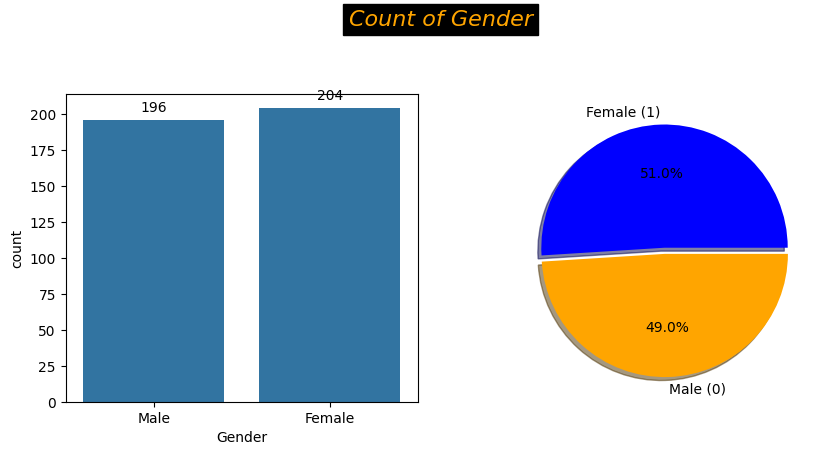

In [20]:
font = {'fontsize': 16, 'fontstyle': 'italic', 'backgroundcolor': 'black', 'color': 'orange'}
plt.style.use('default')  # You can choose a different style if needed

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Countplot
sns.countplot(data=df, x='Gender', ax=axes[0])
for p in axes[0].patches:
    axes[0].annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', 
                     xytext=(0, 9), 
                     textcoords='offset points')

# Pie chart
slices = df['Gender'].value_counts().values
activities = ['Female (1)', 'Male (0)']
axes[1].pie(slices, labels=activities, colors=['blue', 'orange'], shadow=True, explode=[0, 0.05], autopct='%1.1f%%')

plt.suptitle('Count of Gender', y=1.09, **font)
plt.show()

# Feature Engineering
 

In [21]:
df["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [22]:
df["Gender"].replace({'Male': 0, 'Female': 1}, inplace=True)

In [23]:
df

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0
...,...,...,...,...
395,1,46,41000,1
396,0,51,23000,1
397,1,50,20000,1
398,0,36,33000,0


### Assumption : No multicolinearity

In [24]:
# there should not be string correltion between independant variables

In [25]:
vif_df = pd.DataFrame()

df1 = df.iloc[:,:3]

vif_df["Independant Variables"] = df1.columns

vif_df

,Independant Variables
0,Gender
1,Age
2,EstimatedSalary


In [26]:
vif_list = []

for i in range(df1.shape[1]):
    vif = variance_inflation_factor(df1.to_numpy(),i)
    vif_list.append(vif)
    
vif_list

[1.999529144745818, 5.160474685883484, 4.642252849818373]

In [27]:
vif_df["VIF"] = vif_list

In [28]:
vif_df   

,Independant Variables,VIF
0,Gender,1.999529
1,Age,5.160475
2,EstimatedSalary,4.642253


# Feature Selection

In [29]:
df.corr()

,Gender,Age,EstimatedSalary,Purchased
Gender,1.000000,0.073741,0.060435,0.042469
Age,0.073741,1.000000,0.155238,0.622454
EstimatedSalary,0.060435,0.155238,1.000000,0.362083
Purchased,0.042469,0.622454,0.362083,1.000000


<Axes: >

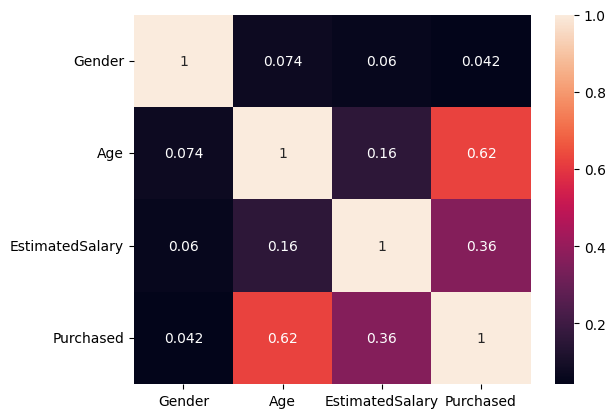

In [30]:
sns.heatmap(df.corr(), annot=True)

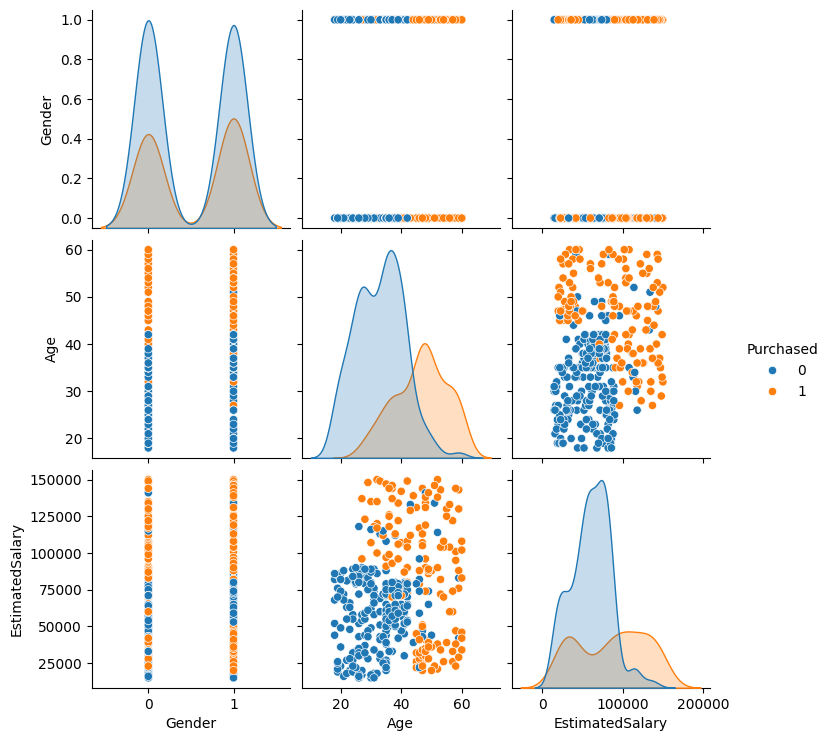

In [31]:
sns.pairplot(df,hue="Purchased")

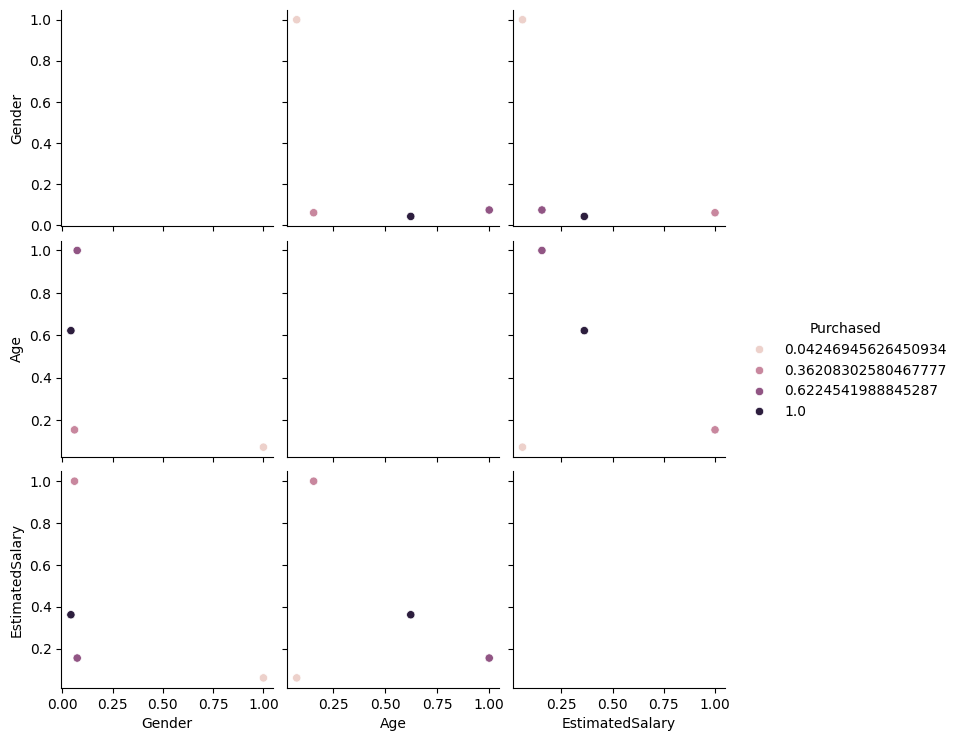

In [32]:
sns.pairplot(df.corr(),hue="Purchased")

In [33]:
x = df1 #independant features
y = df["Purchased"] #dependant features/target column

<Axes: xlabel='Purchased', ylabel='Count'>

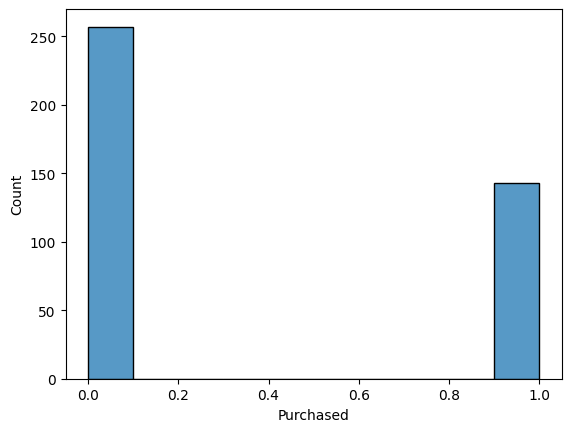

In [34]:
sns.histplot(df["Purchased"])

In [35]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

In [36]:
xtrain.shape

(320, 3)

# Model Training

In [37]:
log_reg = LogisticRegression() 
log_reg

LogisticRegression()

In [38]:
log_reg_model = log_reg.fit(xtrain,ytrain)
log_reg_model

LogisticRegression()

# Evaluation

In [39]:
ytrain_pred = log_reg_model.predict(xtrain)

In [40]:
ytrain_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,

### Evaluation on training data

In [41]:
acc = accuracy_score(ytrain,ytrain_pred)
print("Accuracy : ", acc)

print("-"*50)

print(multilabel_confusion_matrix(ytrain,ytrain_pred))
print("-"*50)

clf_rep = classification_report(ytrain,ytrain_pred)
print(clf_rep)

Accuracy :  0.865625
--------------------------------------------------
[[[ 87  29]
  [ 14 190]]

 [[190  14]
  [ 29  87]]]
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       204
           1       0.86      0.75      0.80       116

    accuracy                           0.87       320
   macro avg       0.86      0.84      0.85       320
weighted avg       0.87      0.87      0.86       320



## Evaluation for testing data

In [42]:
ytest_pred = log_reg_model.predict(xtest)

In [43]:
acc = accuracy_score(ytest,ytest_pred)
print("Accuracy : ", acc)

print("-"*50)

print(multilabel_confusion_matrix(ytest,ytest_pred))
print("-"*50)

clf_rep = classification_report(ytest,ytest_pred)
print(clf_rep)

Accuracy :  0.825
--------------------------------------------------
[[[18  9]
  [ 5 48]]

 [[48  5]
  [ 9 18]]]
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.91      0.87        53
           1       0.78      0.67      0.72        27

    accuracy                           0.82        80
   macro avg       0.81      0.79      0.80        80
weighted avg       0.82      0.82      0.82        80



# Algorithm 2 : Decision Tree

In [44]:
dt_clf = DecisionTreeClassifier()
dt_clf

DecisionTreeClassifier()

In [45]:
dt_clf_model= dt_clf.fit(xtrain ,ytrain)
dt_clf_model

DecisionTreeClassifier()

## Model Evaluation

In [46]:
ytrain_predict= dt_clf_model.predict(xtrain)

In [47]:
ytrain_predict

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,

Accuracy: {1.0}
************************************************************
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       204
           1       1.00      1.00      1.00       116

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320



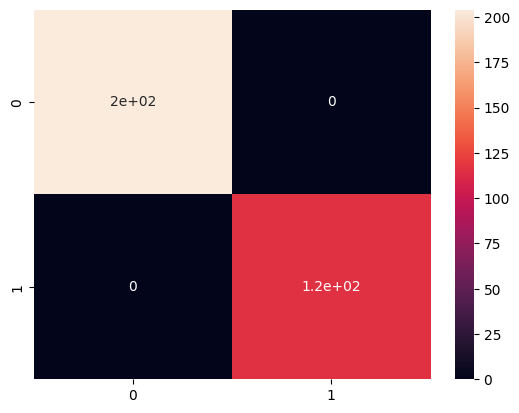

In [48]:
#for training
acc=accuracy_score(ytrain, ytrain_predict)
print(f"Accuracy:",{acc})
print("*"*60)

sns.heatmap(confusion_matrix(ytrain, ytrain_predict),annot = True)

clf_rpt = classification_report(ytrain, ytrain_predict)
print(f"Classification Report : \n",clf_rpt)

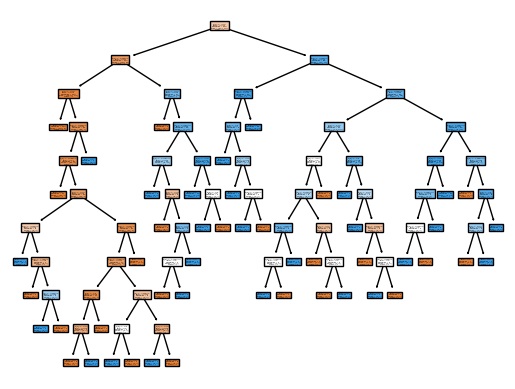

In [49]:
plot_tree(dt_clf_model,filled=True,class_names=["0","1"])
plt.savefig("dt.png")

In [50]:
ytest_predict= dt_clf_model.predict(xtest)

In [51]:
ytest_predict

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0], dtype=int64)

Accuracy: {0.85}
************************************************************
Classification Report : 
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        53
           1       0.78      0.78      0.78        27

    accuracy                           0.85        80
   macro avg       0.83      0.83      0.83        80
weighted avg       0.85      0.85      0.85        80



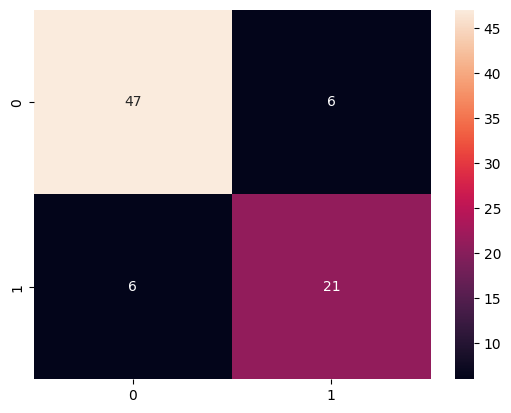

In [52]:
#for testing
acc=accuracy_score(ytest, ytest_predict)
print(f"Accuracy:",{acc})
print("*"*60)

sns.heatmap(confusion_matrix(ytest, ytest_predict),annot = True)

clf_rpt = classification_report(ytest, ytest_predict)
print(f"Classification Report : \n",clf_rpt)

##  1. Hyper parameter Tunning (Decision tree)

In [53]:
hyperparameters = {"criterion" : ["entropy","gini"],
                  "max_depth" : np.arange(2,25),
                  "min_samples_split" : np.arange(1,35),
                  "min_samples_leaf" : np.arange(1,10)}

In [54]:
GSCV = GridSearchCV(dt_clf_model,hyperparameters,cv=5)  #it will perform the grid search over the specified hyperparameters using cross-validation on the training data
GSCV.fit(xtrain,ytrain)
GSCV

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24]),
                         'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34])})

In [55]:
GSCV.best_estimator_                         #accecing the best model

DecisionTreeClassifier(max_depth=4, min_samples_leaf=8, min_samples_split=17)

In [56]:
dt_clf_hyp = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=4,
                       min_samples_split=16)

In [57]:
dt_clf_hyp_model = dt_clf_hyp.fit(xtrain,ytrain)
dt_clf_hyp_model

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=4,
                       min_samples_split=16)

In [58]:
ytrain_pred = dt_clf_hyp_model.predict(xtrain)

Accuracy : 0.915625
************************************************************
Classification Report : 
               precision    recall  f1-score   support

           0       0.91      0.96      0.94       204
           1       0.92      0.84      0.88       116

    accuracy                           0.92       320
   macro avg       0.92      0.90      0.91       320
weighted avg       0.92      0.92      0.91       320



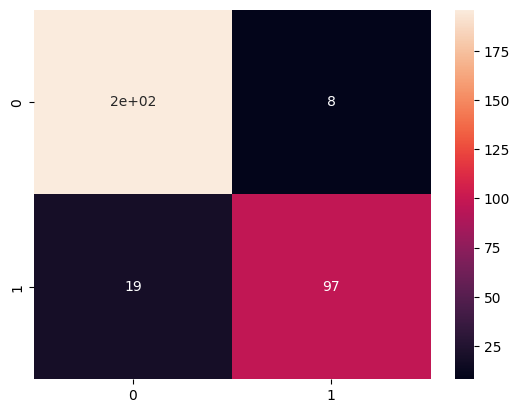

In [59]:
# For Training Data

acc = accuracy_score(ytrain,ytrain_pred)
print(f"Accuracy : {acc}")
print("*"*60)

sns.heatmap(confusion_matrix(ytrain,ytrain_pred),annot = True)

clf_rpt = classification_report(ytrain,ytrain_pred)
print(f"Classification Report : \n",clf_rpt)

In [60]:
ytest_pred = dt_clf_hyp_model.predict((xtest))

Accuracy : 0.925
************************************************************
Classification Report : 
               precision    recall  f1-score   support

           0       0.91      0.98      0.95        53
           1       0.96      0.81      0.88        27

    accuracy                           0.93        80
   macro avg       0.93      0.90      0.91        80
weighted avg       0.93      0.93      0.92        80



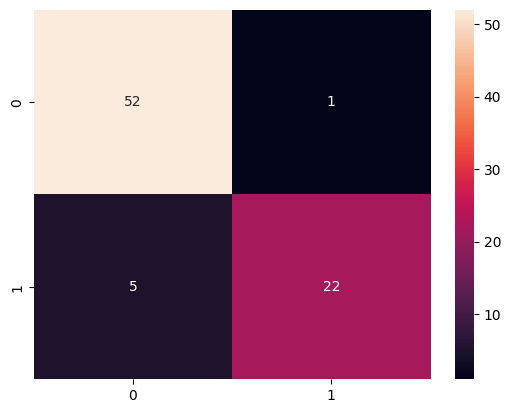

In [61]:
## For Testing Data

acc = accuracy_score(ytest,ytest_pred)
print(f"Accuracy : {acc}")
print("*"*60)

sns.heatmap(confusion_matrix(ytest,ytest_pred),annot = True)

clf_rpt = classification_report(ytest,ytest_pred)
print(f"Classification Report : \n",clf_rpt)

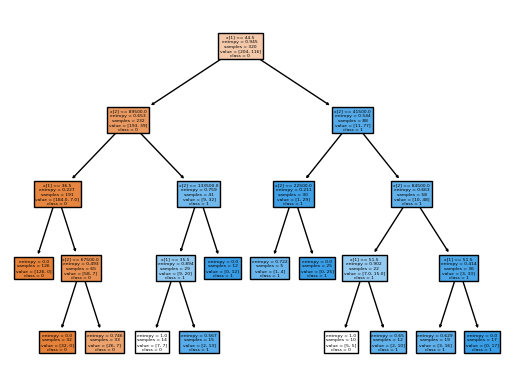

In [62]:
plot_tree(dt_clf_hyp_model,class_names=["0","1"], filled=True)
plt.savefig("dt_hyp.png")

# Random Forest

# Algorithm 3 : Random Forest

In [63]:
rf_clf = RandomForestClassifier()
rf_clf

RandomForestClassifier()

In [64]:
rf_clf_model=rf_clf.fit(xtrain, ytrain)
rf_clf_model

RandomForestClassifier()

In [65]:
ytrain

200    0
325    0
11     0
176    0
56     0
      ..
334    1
53     0
350    1
159    1
22     1
Name: Purchased, Length: 320, dtype: int64

In [66]:
ytrain_pred_rf = rf_clf_model.predict(xtrain)

In [67]:
ytrain_pred_rf

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,

Accuracy : 1.0
************************************************************
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       204
           1       1.00      1.00      1.00       116

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320

************************************************************


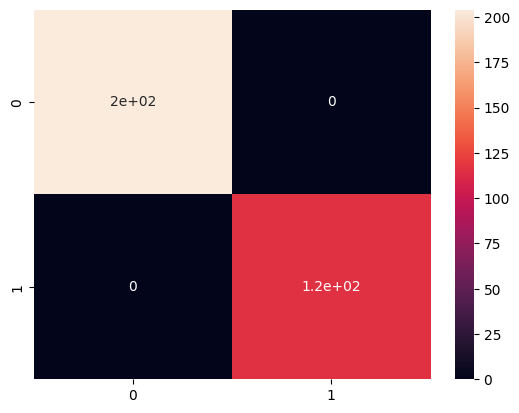

In [68]:
## For Training Data

acc = accuracy_score(ytrain,ytrain_pred_rf)
print(f"Accuracy : {acc}")
print("*"*60)

sns.heatmap(confusion_matrix(ytrain,ytrain_pred_rf),annot = True)


clf_rpt = classification_report(ytrain,ytrain_pred_rf)
print(f"Classification Report : \n",clf_rpt)
print("*"*60)

In [69]:
ytest_pred_rf=rf_clf_model.predict(xtest)


In [70]:
ytest_pred_rf

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1], dtype=int64)

Accuracy : 0.925
************************************************************
Classification Report : 
               precision    recall  f1-score   support

           0       0.93      0.96      0.94        53
           1       0.92      0.85      0.88        27

    accuracy                           0.93        80
   macro avg       0.92      0.91      0.91        80
weighted avg       0.92      0.93      0.92        80

************************************************************


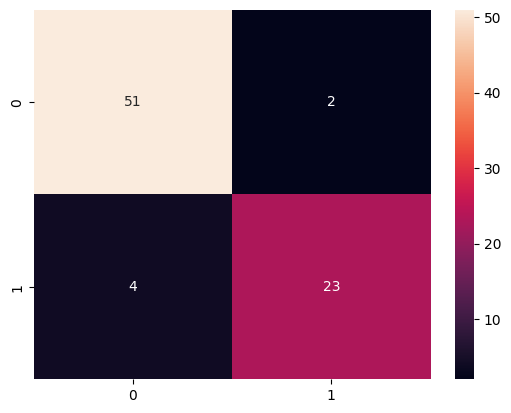

In [71]:
## For Testing Data

acc = accuracy_score(ytest,ytest_pred_rf)
print(f"Accuracy : {acc}")
print("*"*60)

sns.heatmap(confusion_matrix(ytest,ytest_pred_rf),annot = True)


clf_rpt = classification_report(ytest,ytest_pred_rf)
print(f"Classification Report : \n",clf_rpt)
print("*"*60)

## Random Forest with hyperparameter Tunning

In [72]:
hyperparameters = {"criterion" : ["entropy","gini"],
                  "max_depth" : np.arange(2,15),
                  "min_samples_split" : np.arange(3,15),
                  "min_samples_leaf" : np.arange(2,10),
                  "n_estimators": np.arange(2,20)}

In [73]:
rscv = RandomizedSearchCV(rf_clf_model,hyperparameters,cv=5)
rscv

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'n_estimators': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])})

In [74]:
rscv.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'n_estimators': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])})

In [75]:
rscv.best_estimator_

RandomForestClassifier(max_depth=9, min_samples_leaf=7, min_samples_split=5,
                       n_estimators=16)

In [76]:
rf_clf_hyp = RandomForestClassifier(criterion='entropy', max_depth=12, min_samples_leaf=4,
                       min_samples_split=9, n_estimators=18)
rf_clf_hyp_model = rf_clf_hyp.fit(xtrain,ytrain)
rf_clf_hyp_model

RandomForestClassifier(criterion='entropy', max_depth=12, min_samples_leaf=4,
                       min_samples_split=9, n_estimators=18)

In [77]:
ytrain_pred = rf_clf_hyp_model.predict(xtrain)

Accuracy : 0.93125
************************************************************
Classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.93      0.95       204
           1       0.89      0.93      0.91       116

    accuracy                           0.93       320
   macro avg       0.92      0.93      0.93       320
weighted avg       0.93      0.93      0.93       320

************************************************************


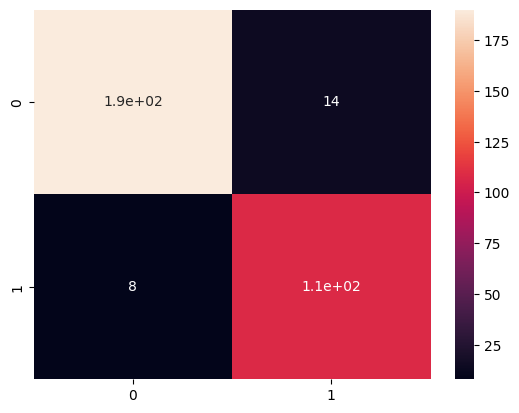

In [78]:
## For Training Data

acc = accuracy_score(ytrain,ytrain_pred)
print(f"Accuracy : {acc}")
print("*"*60)

sns.heatmap(confusion_matrix(ytrain,ytrain_pred),annot = True)


clf_rpt = classification_report(ytrain,ytrain_pred)
print(f"Classification Report : \n",clf_rpt)
print("*"*60)

In [79]:
ytest_pred=rf_clf_hyp_model.predict(xtest)

Accuracy : 0.93125
************************************************************
Classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.93      0.95       204
           1       0.89      0.93      0.91       116

    accuracy                           0.93       320
   macro avg       0.92      0.93      0.93       320
weighted avg       0.93      0.93      0.93       320

************************************************************


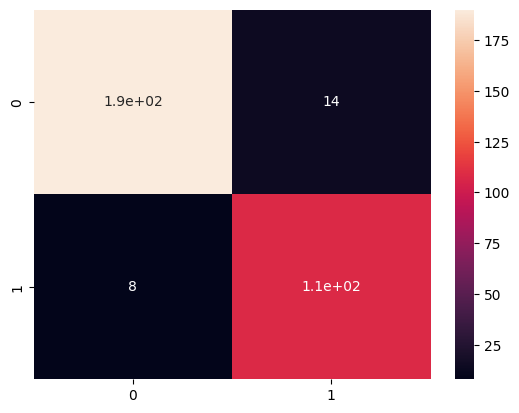

In [80]:
#for testng
acc = accuracy_score(ytrain,ytrain_pred)
print(f"Accuracy : {acc}")
print("*"*60)

sns.heatmap(confusion_matrix(ytrain,ytrain_pred),annot = True)


clf_rpt = classification_report(ytrain,ytrain_pred)
print(f"Classification Report : \n",clf_rpt)
print("*"*60)

## save finalized(Random Forest) model into pickle file

In [81]:
import pickle

In [82]:
with open("final_model.pkl","wb") as f:
    pickle.dump(rf_clf,f)

In [83]:
## load model
with open("final_model.pkl","rb") as f:
    final_model = pickle.load(f)

In [84]:
test_data = df.head(20).iloc[19:20,:3]
test_data

,Gender,Age,EstimatedSalary
19,1,48,29000


### Take input from user

In [85]:
test_data = df.tail(1).iloc[:,:3]
test_data

,Gender,Age,EstimatedSalary
399,1,49,36000


In [86]:
prediction = final_model.predict(test_data)[0]
prediction

1

In [87]:
if prediction == 0:
    print("Sorry!! Customer not Purchased the Product")
else:
    print("Congratulation!! Customer Purchased the Product")

Congratulation!! Customer Purchased the Product
